In [12]:
from keras.optimizers import SGD, RMSprop
import pandas as pd
import numpy as np
import pandas as pd
import csv
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import preprocessing
from sklearn import preprocessing as pp
from keras.preprocessing.text import text_to_word_sequence
import re, os
from nltk.stem import PorterStemmer
from keras.models import Model
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM, Dropout
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn  import  preprocessing
from tqdm import tqdm
import time
from keras.utils import to_categorical
from datetime import datetime
from  keras.preprocessing import sequence
import json
import warnings
stop = stopwords.words('english')
warnings.simplefilter("ignore", UserWarning)
seed = 7
np.random.seed(seed)
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data = pd.read_csv('../input/Womens Clothing E-Commerce Reviews.csv')

In [3]:
data.dropna().head()
data=  data.rename(columns={'Review Text': 'ReviewText'})
data.ReviewText = data.ReviewText.astype(str)

In [4]:
labels =  pd.get_dummies(data['Rating']).values
texts = np.array(data.ReviewText.values)

In [5]:
maxlen = 300 
max_words = 10000
word_embedding_dim = 50
batch_size = 32
max_fatures = 10000
embed_dim = 128
max_sequence_length = 300
pre_trained_wv = True
bilstm = False

In [6]:
def remove_tokenizer(string):
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)

    cleanr = re.compile('<.*?>')

    string = re.sub(r'\d+', '', string)
    string = re.sub(cleanr, '', string)
    string = re.sub("'", '', string)
    string = re.sub(r'\W+', ' ', string)
    string = string.replace('_', '')

    tokenized = [w for w in string.split() if w not in stop]
    
    output = ''
    output = output + tokenized[0]
    for i in tokenized[1:]:
        output = output + ' ' + i
        
    return output

# 2 - A

In [7]:
for i in range(0,len(texts)):
    texts[i] = remove_tokenizer(texts[i])

In [8]:
count_vect = CountVectorizer()

In [9]:
X_train_c = count_vect.fit_transform(texts)
data = X_train_c.toarray()

In [27]:
X_train = data[4697:]
y_train = labels[4697:]
X_test = data[2348:4697]
y_test = labels[2348:4697]
X_val = data[:2348]
y_val = labels[:2348]

# 2-b

### Multilayer Perceptron (MLP) for multi-class softmax classification:

In [28]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=13531))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
          epochs=100,
          batch_size=128,
          validation_data=(X_val, y_val))
#score = model.evaluate(X_test, y_test, batch_size=128)

Train on 18789 samples, validate on 2348 samples
Epoch 1/100
18789/18789 [==============================] - 3s 139us/step - loss: 1.1991 - acc: 0.5508 - val_loss: 1.0626 - val_acc: 0.5439
Epoch 2/100
18789/18789 [==============================] - 2s 125us/step - loss: 1.0271 - acc: 0.5833 - val_loss: 0.9580 - val_acc: 0.6056
Epoch 3/100
18789/18789 [==============================] - 3s 142us/step - loss: 0.9588 - acc: 0.6121 - val_loss: 0.9127 - val_acc: 0.6269
Epoch 4/100
18789/18789 [==============================] - 2s 128us/step - loss: 0.9167 - acc: 0.6254 - val_loss: 0.8930 - val_acc: 0.6256
Epoch 5/100
18789/18789 [==============================] - 2s 129us/step - loss: 0.8918 - acc: 0.6364 - val_loss: 0.8795 - val_acc: 0.6354
Epoch 6/100
18789/18789 [==============================] - 2s 130us/step - loss: 0.8696 - acc: 0.6465 - val_loss: 0.8722 - val_acc: 0.6329
Epoch 7/100
18789/18789 [==============================] - 2s 131us/step - loss: 0.8515 - acc: 0.6496 - val_loss: 0.8

18789/18789 [==============================] - 2s 106us/step - loss: 0.3595 - acc: 0.8626 - val_loss: 1.3427 - val_acc: 0.6193
Epoch 60/100
18789/18789 [==============================] - 2s 104us/step - loss: 0.3530 - acc: 0.8661 - val_loss: 1.3885 - val_acc: 0.6214
Epoch 61/100
18789/18789 [==============================] - 2s 104us/step - loss: 0.3536 - acc: 0.8644 - val_loss: 1.3776 - val_acc: 0.6201
Epoch 62/100
18789/18789 [==============================] - 2s 107us/step - loss: 0.3457 - acc: 0.8680 - val_loss: 1.3709 - val_acc: 0.6307
Epoch 63/100
18789/18789 [==============================] - 2s 104us/step - loss: 0.3446 - acc: 0.8690 - val_loss: 1.3510 - val_acc: 0.6256
Epoch 64/100
18789/18789 [==============================] - 2s 104us/step - loss: 0.3462 - acc: 0.8658 - val_loss: 1.3734 - val_acc: 0.6218
Epoch 65/100
18789/18789 [==============================] - 2s 103us/step - loss: 0.3385 - acc: 0.8683 - val_loss: 1.3692 - val_acc: 0.6184
Epoch 66/100
18789/18789 [=======

In [29]:
def plot_model(hist):
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

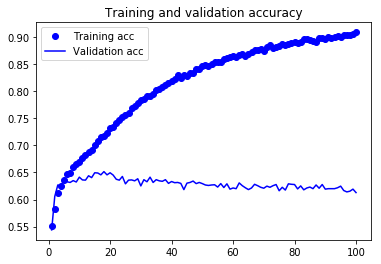

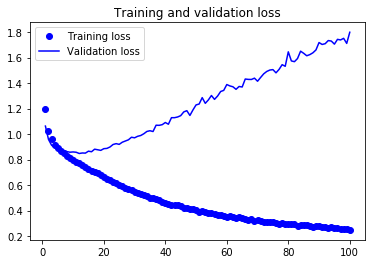

In [30]:
plot_model(history)

In [31]:
loss, acc = model.evaluate(X_test, y_test, batch_size=128)
print("loss: ", loss)
print("Acurácia: ", acc)

2349/2349 [==============================] - 0s 76us/step
loss:  1.8433787235050518
Acurácia:  0.6198382290463186


# 2 - c

In [35]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(1000,
                    50,
                    input_length=13531))
model.add(Conv1D(64,3,
                padding='valid',
                 activation='relu',
                 strides=1, input_shape=(13531, 1)))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))
sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 13531, 50)         50000     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13529, 64)         9664      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 165       
Total params: 61,909
Trainable params: 61,909
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train,
          batch_size=300,
          epochs=100,
          validation_data=(X_val, y_val))

Train on 18789 samples, validate on 2348 samples
Epoch 1/100
18789/18789 [==============================] - 47s 2ms/step - loss: 1.5341 - acc: 0.5114 - val_loss: 1.4485 - val_acc: 0.5430
Epoch 2/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.3720 - acc: 0.5613 - val_loss: 1.3255 - val_acc: 0.5430
Epoch 3/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2763 - acc: 0.5613 - val_loss: 1.2690 - val_acc: 0.5430
Epoch 4/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2369 - acc: 0.5613 - val_loss: 1.2506 - val_acc: 0.5430
Epoch 5/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2238 - acc: 0.5613 - val_loss: 1.2436 - val_acc: 0.5430
Epoch 6/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2184 - acc: 0.5613 - val_loss: 1.2398 - val_acc: 0.5430
Epoch 7/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2155 - acc: 0.5613 - val_loss: 1.2370 - v

18789/18789 [==============================] - 45s 2ms/step - loss: 1.2084 - acc: 0.5613 - val_loss: 1.2283 - val_acc: 0.5430
Epoch 60/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2083 - acc: 0.5613 - val_loss: 1.2285 - val_acc: 0.5430
Epoch 61/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2083 - acc: 0.5613 - val_loss: 1.2285 - val_acc: 0.5430
Epoch 62/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2083 - acc: 0.5613 - val_loss: 1.2284 - val_acc: 0.5430
Epoch 63/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2082 - acc: 0.5613 - val_loss: 1.2284 - val_acc: 0.5430
Epoch 64/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2082 - acc: 0.5613 - val_loss: 1.2282 - val_acc: 0.5430
Epoch 65/100
18789/18789 [==============================] - 45s 2ms/step - loss: 1.2082 - acc: 0.5613 - val_loss: 1.2285 - val_acc: 0.5430
Epoch 66/100
18789/18789 [==============

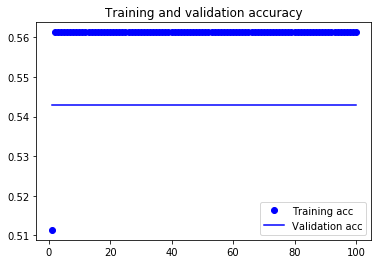

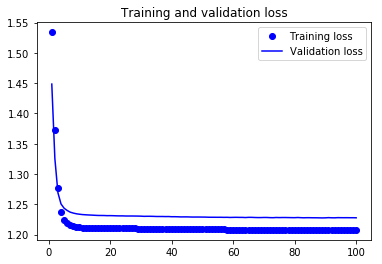

In [37]:
plot_model(history)

In [ ]:
loss, acc = model.evaluate(X_test, y_test, batch_size=128)
print("loss: ", loss)
print("Acurácia: ", acc)

 896/2349 [==========>...................] - ETA: 1s